In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

In [5]:
# Folder where the generated .ecsv files are stored
folder = "create_files"
n_rosettas = 20  # Rosetta numbers from 0 to 19

In [16]:
data_list = []
rand_list = []

for i in range(n_rosettas):

    # Build the filenames for data and random catalogs
    data_file = os.path.join(folder, f"QSO_{i}_clustering_data.ecsv")
    rand_file = os.path.join(folder, f"QSO_{i}_clustering_random.ecsv")

    data = Table.read(data_file).to_pandas()
    rand = Table.read(rand_file).to_pandas()

    data_list.append(data)
    rand_list.append(rand)

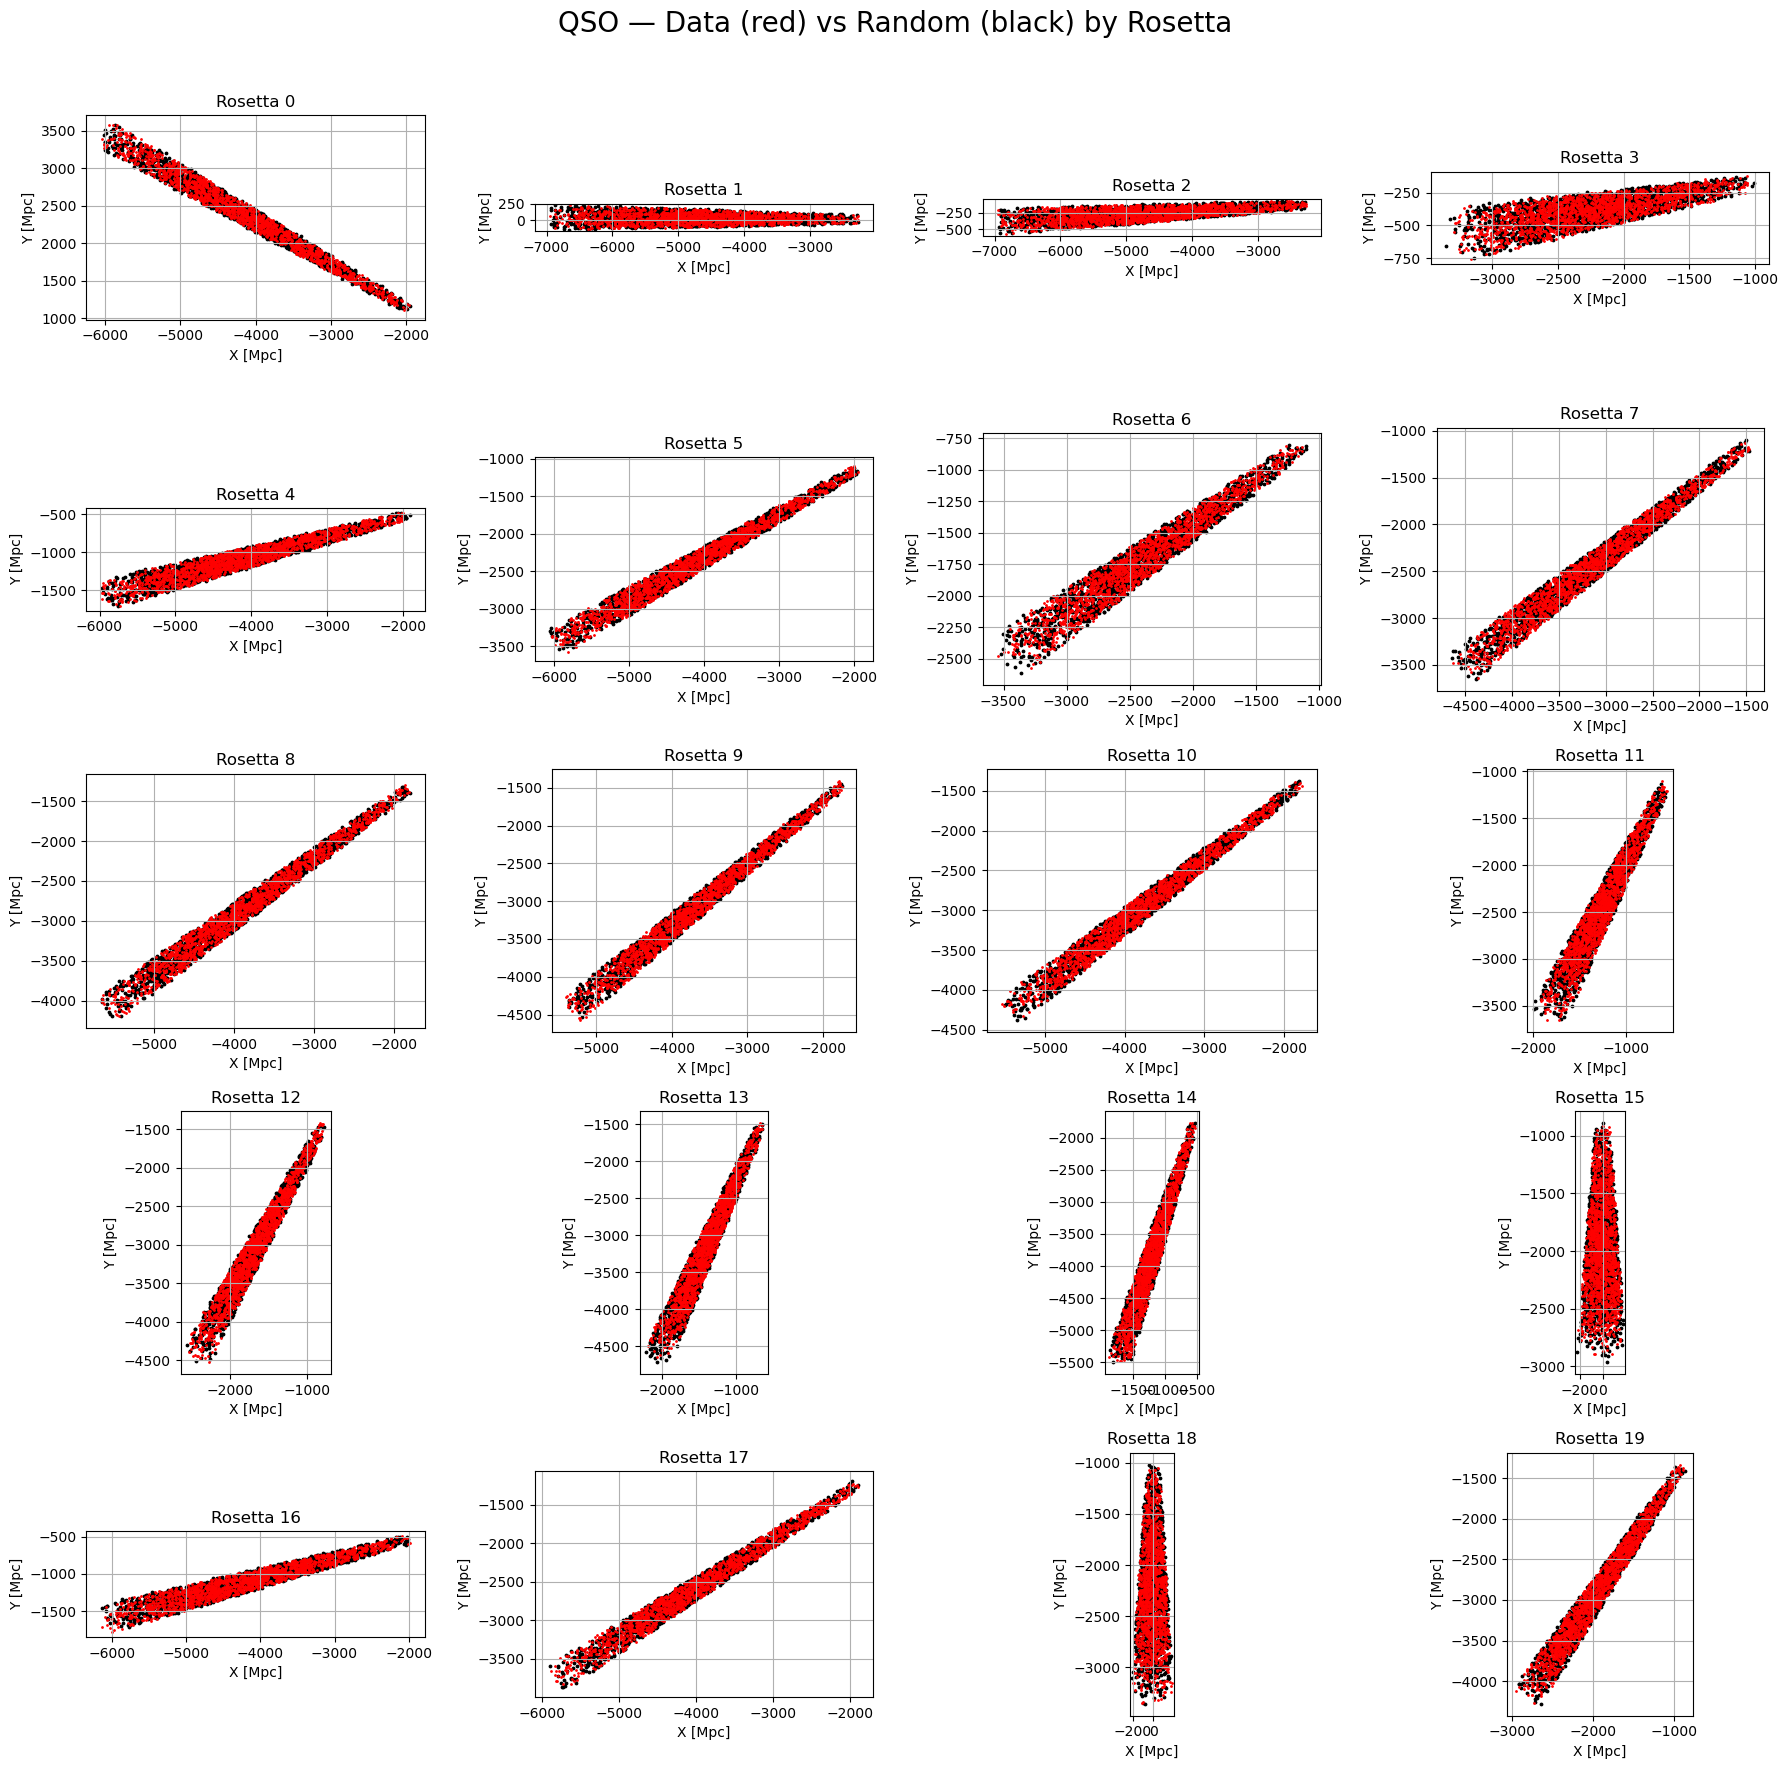

In [17]:
fig, axes = plt.subplots(5, 4, figsize=(18, 18))
axes = axes.flatten()

for i in range(n_rosettas):
    ax = axes[i]

    data = data_list[i]
    rand = rand_list[i]

    ax.scatter(rand['X'], rand['Y'], s=3, color='black', label='Random')
    ax.scatter(data['X'], data['Y'], s=1, color='red', label='Data')

    ax.set_title(f'Rosetta {i}')
    ax.set_xlabel('X [Mpc]')
    ax.set_ylabel('Y [Mpc]')
    ax.set_aspect('equal', 'box')
    ax.grid(True)

plt.suptitle('QSO — Data (red) vs Random (black) by Rosetta', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

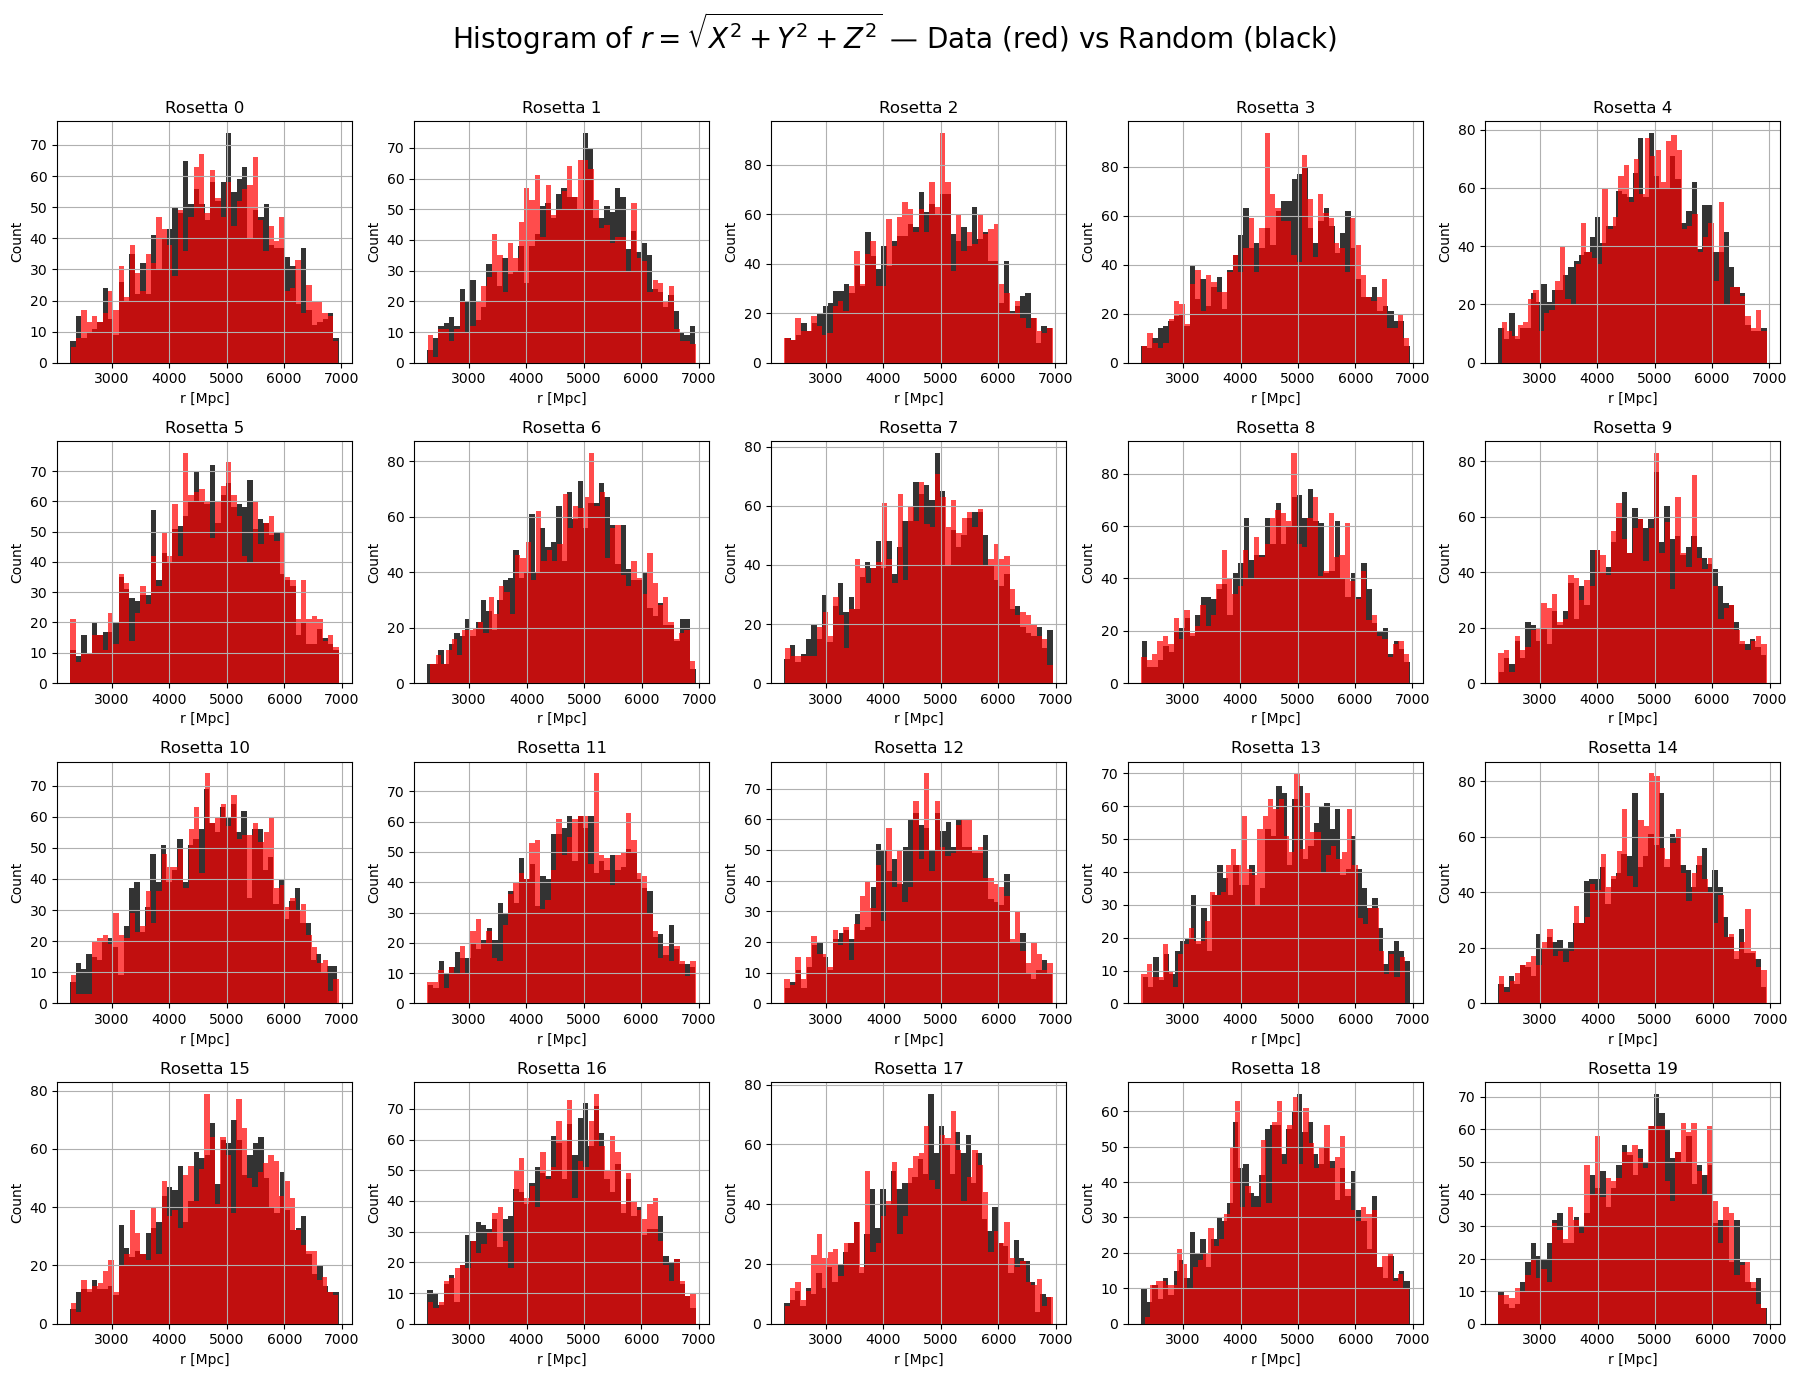

In [26]:
fig, axes = plt.subplots(4, 5, figsize=(18, 14))
axes = axes.flatten()

for i in range(n_rosettas):
    ax = axes[i]
    data = data_list[i]
    rand = rand_list[i]

    r_data = np.sqrt(data['X']**2 + data['Y']**2 + data['Z']**2)
    r_rand = np.sqrt(rand['X']**2 + rand['Y']**2 + rand['Z']**2)

    ax.hist(r_rand, bins=50, color='black', alpha=0.8, label='Random')
    ax.hist(r_data, bins=50, color='red', alpha=0.7, label='Data')

    ax.set_title(f'Rosetta {i}')
    ax.set_xlabel('r [Mpc]')
    ax.set_ylabel('Count')
    ax.grid(True)

fig.suptitle(r'Histogram of $r = \sqrt{X^2 + Y^2 + Z^2}$ — Data (red) vs Random (black)', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()